In [1]:
!pip install --upgrade pandas-datareader


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 4.4 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [2]:
import pandas_datareader
pandas_datareader.__version__ 

'0.10.0'

In [3]:
import math 
import pandas_datareader as web
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
df = web.DataReader('AAPL' , data_source='yahoo',start='2015-01-01',end='2022-10-15')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.644020
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,23.949755
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,23.952013
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.287868
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.221062
...,...,...,...,...,...,...
2022-10-10,141.889999,138.570007,140.419998,140.419998,74899000.0,140.419998
2022-10-11,141.350006,138.220001,139.899994,138.979996,77033700.0,138.979996
2022-10-12,140.360001,138.160004,139.130005,138.339996,70433700.0,138.339996


In [5]:
df.shape

(1961, 6)

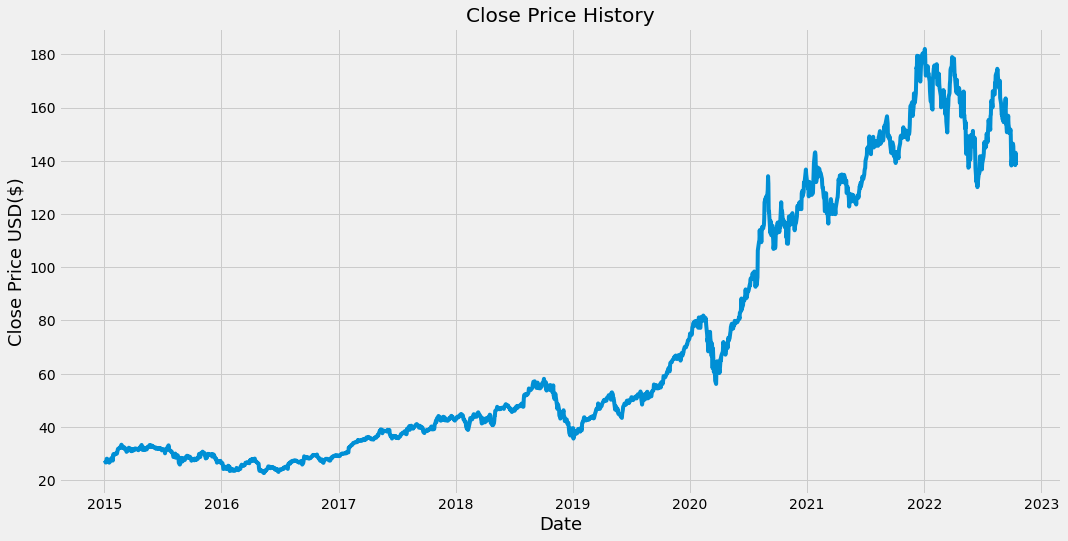

In [6]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize = 18)
plt.show()

In [7]:
data = df.filter(['Close'])

dataset = data.values

training_data_len = math.ceil(len(dataset)*.8)

training_data_len

1569

In [8]:
#scale the data

scaler =MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0297789 ],
       [0.02494904],
       [0.02496473],
       ...,
       [0.7260781 ],
       [0.75524548],
       [0.72632905]])

In [9]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train= []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.0297789 , 0.02494904, 0.02496473, 0.02730125, 0.03379333,
       0.03398151, 0.02965345, 0.03117454, 0.03051593, 0.02584288,
       0.02454132, 0.02882234, 0.03012389, 0.03459308, 0.0355026 ,
       0.03569077, 0.02948095, 0.03915635, 0.04478596, 0.04205741,
       0.04436256, 0.04439393, 0.04582092, 0.04641682, 0.044833  ,
       0.04607183, 0.04967853, 0.0541634 , 0.05664106, 0.05761331,
       0.05878941, 0.06018505, 0.05976165, 0.06140819, 0.06689667,
       0.06559511, 0.06029481, 0.06285087, 0.05977734, 0.06076525,
       0.06118866, 0.05990277, 0.05656266, 0.0568606 , 0.05770739,
       0.0535832 , 0.05002353, 0.0534891 , 0.05214051, 0.05427317,
       0.05755058, 0.05979302, 0.05827192, 0.05576291, 0.05781716,
       0.05700174, 0.0518112 , 0.0531598 , 0.05160735, 0.05649993])]
[0.053457746504823156]

[array([0.0297789 , 0.02494904, 0.02496473, 0.02730125, 0.03379333,
       0.03398151, 0.02965345, 0.03117454, 0.03051593, 0.02584288,
       0.02454132, 0.02882234, 0.0

In [11]:
x_train, y_train = np.array(x_train) , np.array(y_train)

In [13]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1509, 60, 1)

In [14]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [15]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1509/1509 [==============================] - 43s 26ms/step - loss: 0.0012


In [17]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [18]:
x_test= np.array(x_test)

In [19]:
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [20]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 2s 27ms/step


In [21]:
rmse = np.sqrt( np.mean( predictions - y_test )**2)
rmse

7.522915100564762

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


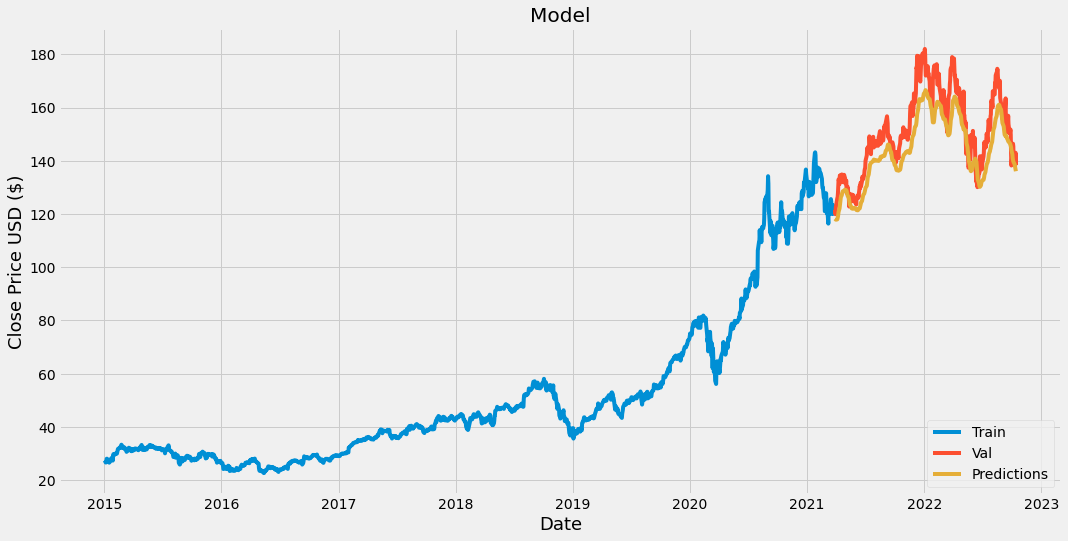

In [23]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val','Predictions'], loc='lower right')
plt.show()

In [24]:
valid

,Close,Predictions
Date,,
2021-03-29,121.389999,118.204185
2021-03-30,119.900002,118.080147
2021-03-31,122.150002,117.866150
2021-04-01,123.000000,117.823959
2021-04-05,125.900002,117.944527
...,...,...
2022-10-10,140.419998,138.730301
2022-10-11,138.979996,138.027954
2022-10-12,138.339996,137.230591


In [25]:
from google.colab import data_table
data_table.disable_dataframe_formatter()

In [26]:
valid

,Close,Predictions
Date,,
2021-03-29,121.389999,118.204185
2021-03-30,119.900002,118.080147
2021-03-31,122.150002,117.866150
2021-04-01,123.000000,117.823959
2021-04-05,125.900002,117.944527
...,...,...
2022-10-10,140.419998,138.730301
2022-10-11,138.979996,138.027954
2022-10-12,138.339996,137.230591


In [32]:
apple_quote = web.DataReader('AAPL' , data_source='yahoo',start='2015-01-01',end='2022-10-15')
new_df = apple_quote.filter(['Close'])

last_60_days = new_df[-60:].values

last_60_days_scaled = scaler.transform(last_60_days)

X_test = []  

X_test.append(last_60_days_scaled)

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

pred_price = model.predict(X_test)

pred_price =scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 23ms/step
[[135.55153]]
